In [1]:
from PIL import Image, ImageOps
import numpy as np
import math
import matplotlib.pyplot as plt

None
(237, 270)
L


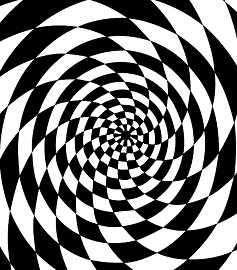

In [2]:
image = Image.open('op-art-black-and-white-infinity-whirl-tom-hill.jpg')
#image = Image.open('ok_gibbs.jpg')
image = ImageOps.grayscale(image)
print(image.format)
print(image.size)
length = image.size[0]
height = image.size[1]
print(image.mode)
# afficher l'image
data = np.asarray(image)
image

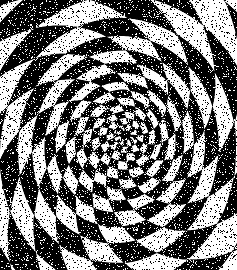

In [3]:
# Constantes

tau = 1.18 # écart-type de yi|xi=k
alpha = 0 # paramètre devant somme xi dans la loi d'Ising
beta = 0.3 # paramètre devant nombre de voisins de même couleur dans la loi d'Ising

def bruiteur(image, proba):
  image_array = data.astype('int16')
  image_array = image_array
  # Pour chaque pixel, on inverse sa couleur avec proba 10 %
  for i in range(np.shape(image_array)[0]):
    for j in range(np.shape(image_array)[1]):
      a = np.random.choice([-1, 1], None, p=[proba, 1-proba])
      if a < 0:
        image_array[i][j] = 255 - image_array[i][j]
  return image_array
bruit_test = bruiteur(image, 0.1) # Bruitage par inversion de 10 % des pixels
from matplotlib import cm
PIL_image = Image.fromarray(np.uint8(bruit_test)).convert('L')
PIL_image

In [4]:
bruit_test_norm = 2*(bruit_test/255)-1 # yi € {-1 ; 1} (image bruitée, 1 = noir, -1 = blanc), xi € {-1 ; 1} (image restaurée, 1 = noir, -1 = blanc)

##Echantilloneur de Gibbs pour sampler selon xi|yi

In [6]:
# Sampler de Gibbs (tau, alpha, beta connus)
# https://towardsdatascience.com/image-denoising-with-gibbs-sampling-mcmc-concepts-and-code-implementation-11d42a90e153
# https://pchanda.github.io/IsingModelDenoising/

def debruiteur(img_bruitee, samples, alpha, beta, tau):
  probas = np.zeros(bruit_test_norm.shape)
  img_random = 2*np.random.randint(2, size=(height, length))-1
  for step in range(samples):
          for i in range(1, img_random.shape[0]-1):
              for j in range(1, img_random.shape[1]-1):
                  y = sample_y(i, j, img_random, img_bruitee, alpha, beta, tau)
                  img_random[i, j] = y
                  if y == 1:
                      probas[i, j] += 1
  probas = probas / samples
  return probas

def sample_y(i, j, Y, X, alpha, beta, tau): #échantillon de P(x[i,j] | V(x[i,j])) (V[x[i,j]] contient les pixels adjacents à x[i,j], et contient y[i,j])
    markov_blanket = [Y[i - 1, j], Y[i, j - 1], Y[i, j + 1], Y[i + 1, j], X[i, j]]
    w = ((markov_blanket[-1]-1)**2)/(2*tau**2) - alpha + beta * sum(markov_blanket)
    w2 = ((markov_blanket[-1]+1)**2)/(2*tau**2) + alpha - beta * sum(markov_blanket)
    prob = np.exp(w)/(np.exp(w2) + np.exp(w))
    return (np.random.rand() < prob) * 2 - 1
  
probas = debruiteur(bruit_test_norm, 20, alpha, beta, tau)

In [39]:
probas_copy = probas[:]

In [40]:
probas_copy

array([[0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.45, 0.6 , ..., 0.05, 0.15, 0.  ],
       [0.  , 0.7 , 0.8 , ..., 0.  , 0.15, 0.  ],
       ...,
       [0.  , 1.  , 0.9 , ..., 0.25, 0.35, 0.  ],
       [0.  , 0.8 , 0.8 , ..., 0.45, 0.1 , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ]])

## Pour afficher l'image débruitée

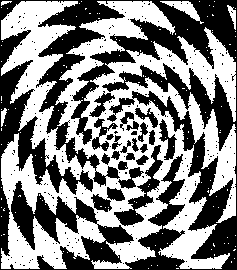

In [41]:
probas_copy[probas_copy > 0.5] = 255
probas_copy[probas_copy <= 0.5] = 0
PIL_image2 = Image.fromarray(np.uint8(probas_copy)).convert('L')
PIL_image2

## Question 2 : tau inconnu, on suppose une loi a priori en Inverse-Gamma

tau estimé : 1.4798543212870239
distance entre images :  57152.26191592436


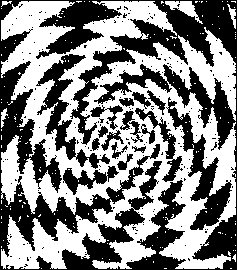

tau estimé : 1.4602872783341885
distance entre images :  57555.244803875605


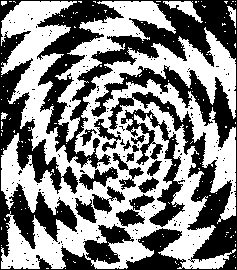

tau estimé : 1.4411846233721055
distance entre images :  58129.8216908892


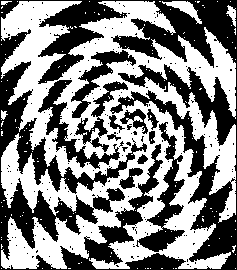

tau estimé : 1.42274144273166
distance entre images :  58529.03477105798


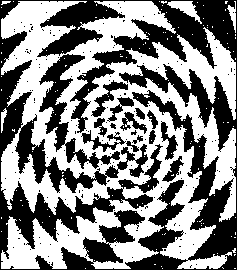

tau estimé : 1.4060461850674444
distance entre images :  58675.10087513674


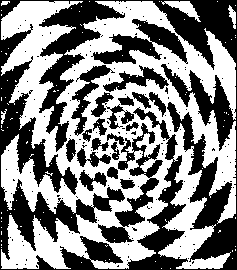

tau estimé : 1.3885323469092072
distance entre images :  58746.41639318644


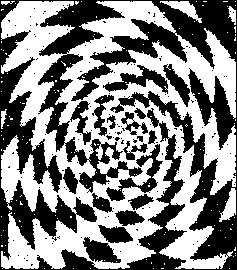

tau estimé : 1.3710991771428775
distance entre images :  59083.21644006876


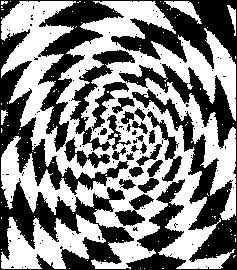

tau estimé : 1.3547728712975382
distance entre images :  59258.41686200969


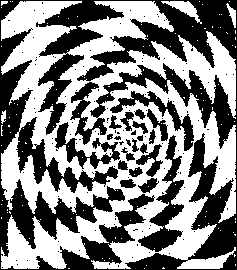

tau estimé : 1.337949211839156
distance entre images :  59426.559853102044


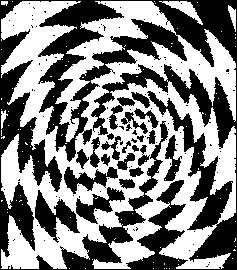

tau estimé : 1.320904955166552
distance entre images :  59556.11611189249


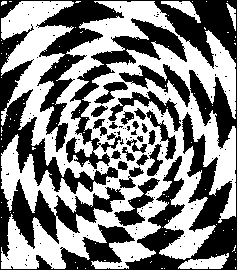

tau estimé : 1.3045913011047114
distance entre images :  59521.46655727457


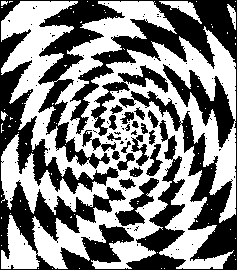

tau estimé : 1.2889144715395133
distance entre images :  59832.15689951555


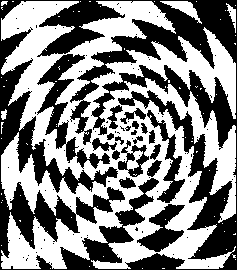

tau estimé : 1.2731286202218968
distance entre images :  59788.07884044382


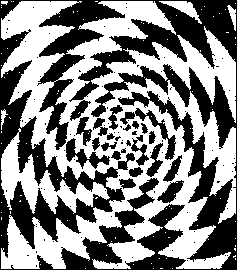

tau estimé : 1.2571696901691771
distance entre images :  59875.58141897171


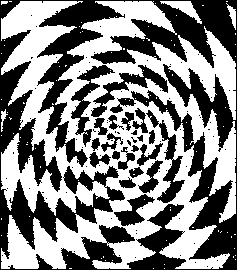

tau estimé : 1.2428413669780871
distance entre images :  59879.909126426006


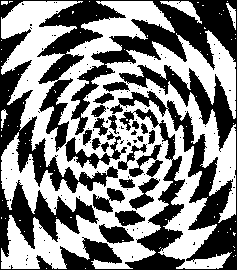

tau estimé : 1.2282723612003268
distance entre images :  59933.272230035946


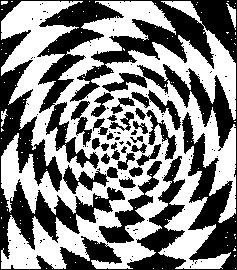

tau estimé : 1.2143223758529762
distance entre images :  59954.42858259103


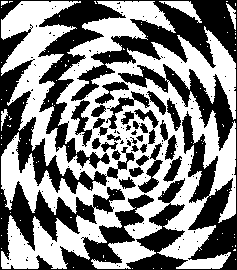

tau estimé : 1.2002879014571164
distance entre images :  60010.720659478044


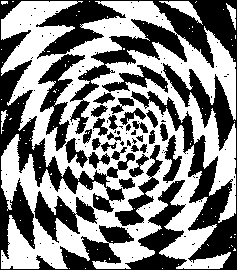

tau estimé : 1.1872603387527325
distance entre images :  60014.28723238006


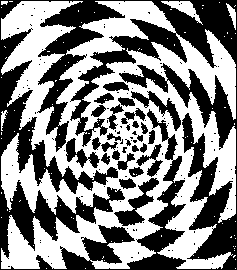

tau estimé : 1.1743360471710973
distance entre images :  60006.61611189249


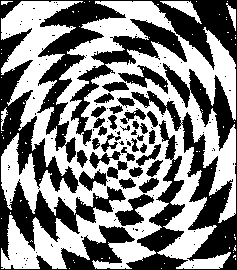

tau estimé : 1.161840497352799
distance entre images :  60033.99703078606


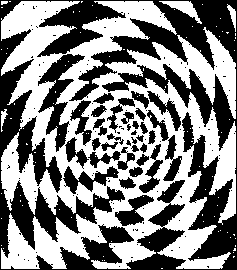

tau estimé : 1.149659293584994
distance entre images :  60057.114002187845


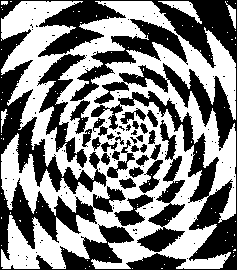

tau estimé : 1.1377649848021851
distance entre images :  60019.993749023284


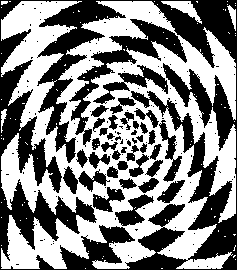

tau estimé : 1.126495525817671
distance entre images :  59963.77340209408


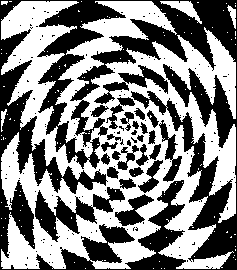

tau estimé : 1.116631020875806
distance entre images :  59976.43772464448


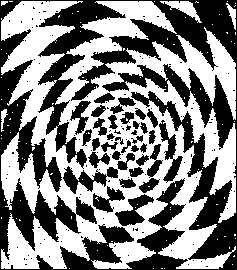

tau estimé : 1.1069724093331479
distance entre images :  60052.746444756995


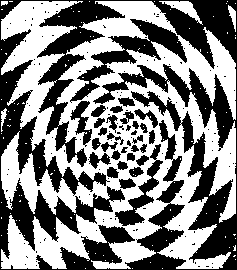

tau estimé : 1.0972917506163269
distance entre images :  59969.89435849351


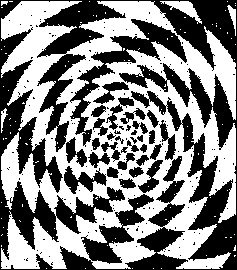

tau estimé : 1.088808260158999
distance entre images :  59985.66299421785


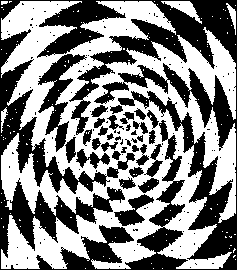

tau estimé : 1.0811623330845614
distance entre images :  59913.68596655728


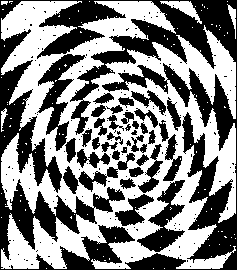

tau estimé : 1.0732850724627814
distance entre images :  59947.02844194405


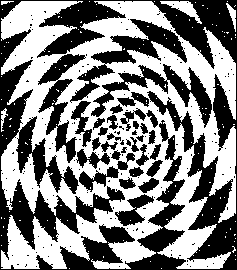

tau estimé : 1.0662921115546078
distance entre images :  59918.360368807625


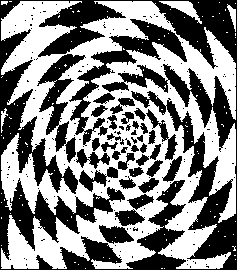

tau estimé : 1.059724654152511
distance entre images :  59872.90350054696


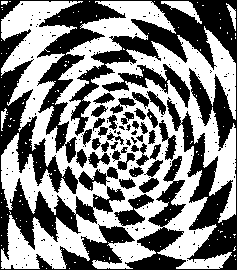

tau estimé : 1.054808671955273
distance entre images :  59860.310907954365


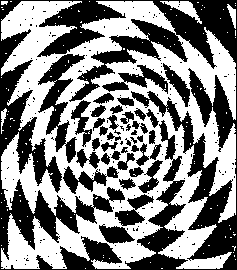

KeyboardInterrupt: ignored

In [8]:
#Q2, a priori inverse-gamma

import math

alpha_ising = 0
beta_ising = 0.3
gamma_inv = 3
rho_inv = 0.5

def sample_y_Q2(i, j, Y, X, alpha, beta, tau): #échantillon de P(x[i,j] | V(x[i,j])) (V[x[i,j]] contient les pixels adjacents à x[i,j], et contient y[i,j])
    markov_blanket = [Y[i - 1, j], Y[i, j - 1], Y[i, j + 1], Y[i + 1, j], X[i, j]]
    w = ((markov_blanket[-1]-1)**2)/(2*tau**2) - alpha + beta * sum(markov_blanket)
    w2 = ((markov_blanket[-1]+1)**2)/(2*tau**2) + alpha - beta * sum(markov_blanket)
    prob = np.exp(w)/(np.exp(w2) + np.exp(w))
    return (np.random.rand() < prob) * 2 - 1

def metropolis_hastings(target_density, a, b, tau_precedent, size=1):
    burnin_size = 0
    size += burnin_size
    x0 = tau_precedent
    xt = x0
    samples = []
    for i in range(size):
        xt_candidate = np.random.normal(xt, 0.15)
        accept_prob = min((target_density(xt_candidate))/(target_density(xt)), 1)
        if np.random.uniform(0, 1) < accept_prob:
            xt = xt_candidate
        samples.append(xt)
    return samples[0]

def debruiteur_Q2(img_bruitee, alpha_ising, beta_ising, gamma_inv, rho_inv, nbre_tirages):
  img_random = 2*np.random.randint(2, size=(height, length))-1
  a,b = img_random.shape
  sim_tau = [1.5*np.ones((height, length)) for i in range(nbre_tirages)]
  somme_voisins = 0
  samplez = 35
  probas = np.zeros((height, length))
  for step in range(1, nbre_tirages):
    mean_step=np.mean(sim_tau[step-1])
    for s in range(samplez):
      for k in range(1, img_random.shape[0]-1):
        for l in range(1, img_random.shape[1]-1):
          y = sample_y_Q2(k, l, img_random, img_bruitee, alpha_ising, beta_ising, mean_step)
          img_random[k, l] = y
          if y == 1:
            probas[k,l] += 1
          markov_blanket = [img_random[k - 1, l], img_random[k, l - 1], img_random[k, l + 1], img_random[k + 1, l], img_bruitee[k, l]]
          somme_voisins = 0
          for g in range(len(markov_blanket)):
            if (img_random[k,l] == markov_blanket[g]):
              somme_voisins+=1
          fct_actuelle = lambda tau: 1/(tau**(gamma_inv+2))*math.exp(-1/(2*tau**2)*((img_random[k,l] - img_bruitee[k,l])**2) + beta_ising*somme_voisins - rho_inv/tau)
          sim_tau[step][k, l] = metropolis_hastings(fct_actuelle, a, b, sim_tau[step-1][k, l], size=1)
    img_random = 2*(probas/samplez >= 0.5) - 1 # Matrice des y déterminés par Gibbs
    probas = np.zeros((height, length)) # Reset de la matrice probas (sinon l'image disparaît petit à petit)
    sim_tau[step] = np.mean(sim_tau[step])*np.ones((height,length))
    print("tau estimé :", np.mean(sim_tau[step]))
    img_random[img_random == 1] = 255
    img_random[img_random == -1] = 0
    img_random = np.array(img_random, dtype=np.int64) # image débruitée après l'étape step
    print("distance entre images : ", np.mean(np.square(img_random - data))) # affiche la distance entre l'image débruitée générée et l'image originale
    PIL_image2 = Image.fromarray(np.uint8(img_random)).convert('L')
    display(PIL_image2)
    img_random = 2*np.random.randint(2, size=(height,length)) - 1
  return sim_tau

debruiteur_Q2(bruit_test_norm, alpha_ising, beta_ising, gamma_inv, rho_inv, 100)

alpha estimé : 0.009825905280690732
beta estimé : 0.22304125203729727
tau estimé : 0.568959835110315
distance entre images :  7069.524691358025


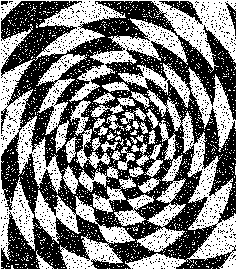

alpha estimé : 0.009816302553194987
beta estimé : 0.2476510983501798
tau estimé : 0.6435832869006353
distance entre images :  7076.633927176122


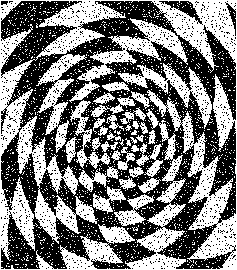

alpha estimé : 0.009820728271930434
beta estimé : 0.27080988486803037
tau estimé : 0.7144227299658467
distance entre images :  7086.098296608845


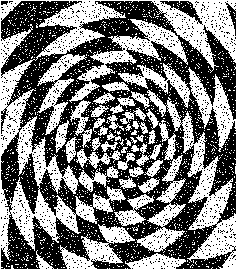

alpha estimé : 0.009812803956870737
beta estimé : 0.29261411297789497
tau estimé : 0.7799742946732046
distance entre images :  7098.447804344429


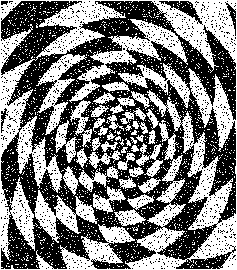

alpha estimé : 0.009807870463819732
beta estimé : 0.31360983952134824
tau estimé : 0.8391959932432287
distance entre images :  6623.332473824035


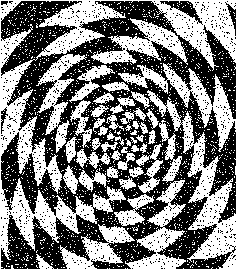

alpha estimé : 0.009789873226395995
beta estimé : 0.33392886424142676
tau estimé : 0.8919823595822819
distance entre images :  5165.468901390842


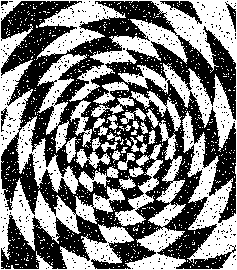

alpha estimé : 0.00978415600023085
beta estimé : 0.3534522776228574
tau estimé : 0.938986590532677
distance entre images :  3872.1538521644006


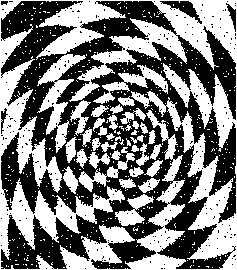

alpha estimé : 0.00977701820871622
beta estimé : 0.3723394451260541
tau estimé : 0.9802414148433675
distance entre images :  3089.8788873261446


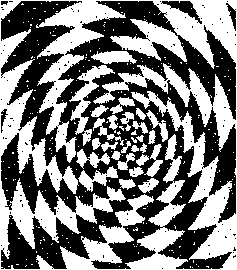

alpha estimé : 0.009780169522084233
beta estimé : 0.3907634937121818
tau estimé : 1.0166529320607065
distance entre images :  2730.204953899047


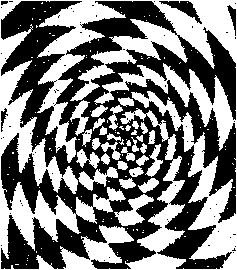

alpha estimé : 0.009776898480678786
beta estimé : 0.40863054620659894
tau estimé : 1.048960998362888
distance entre images :  2634.0629004531957


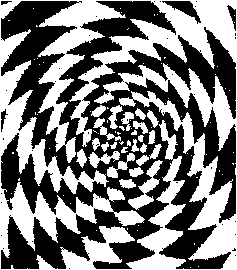

alpha estimé : 0.009771157082614619
beta estimé : 0.42583847393738056
tau estimé : 1.0774254089430735
distance entre images :  2686.808329426473


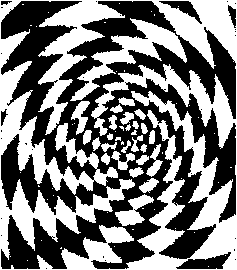

alpha estimé : 0.009751997153134377
beta estimé : 0.44267108917005327
tau estimé : 1.1026318292773778
distance entre images :  2829.439365525863


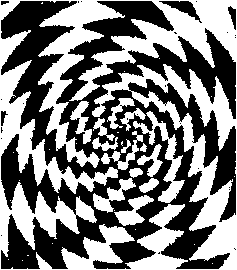

alpha estimé : 0.009737588465487775
beta estimé : 0.459023482201158
tau estimé : 1.1249501396593846
distance entre images :  3195.5450851695578


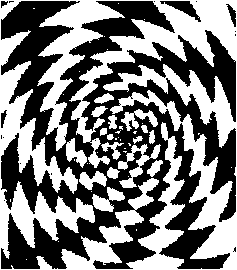

alpha estimé : 0.009743645265950753
beta estimé : 0.47496712251340195
tau estimé : 1.1447558949261076
distance entre images :  3617.0343022347242


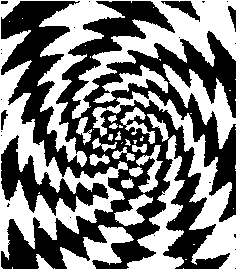

alpha estimé : 0.009731152370712872
beta estimé : 0.4905634804357739
tau estimé : 1.1623292326240124
distance entre images :  4416.042272230036


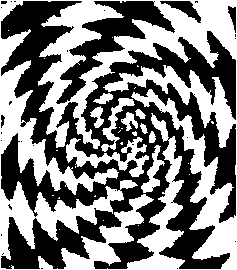

alpha estimé : 0.009711661700350123
beta estimé : 0.5057518823836169
tau estimé : 1.1777622445987994
distance entre images :  5538.974761681513


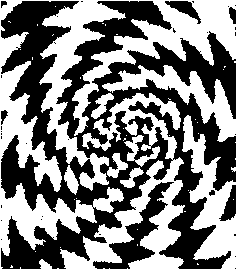

alpha estimé : 0.00970353223302224
beta estimé : 0.5205406548971139
tau estimé : 1.1911906815429236
distance entre images :  6665.346304110018


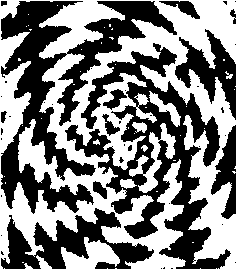

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:69: RuntimeWarning: overflow encountered in exp


alpha estimé : 0.009689227598443673
beta estimé : 0.5351348486433344
tau estimé : 1.2024405392579547
distance entre images :  8872.166275980622


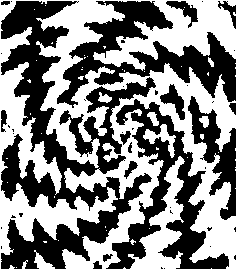

alpha estimé : 0.009676884427784587
beta estimé : 0.5492257790779951
tau estimé : 1.2121568213203269
distance entre images :  10976.520003125488


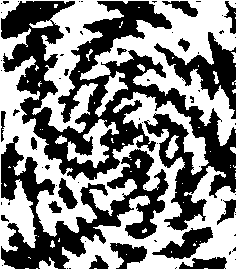

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:66: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in double_scalars


alpha estimé : 0.00968000472554374
beta estimé : 0.5631739204711175
tau estimé : 1.2203616063086342
distance entre images :  13373.109548366932


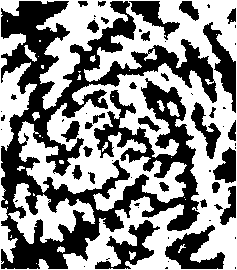

KeyboardInterrupt: ignored

In [21]:
#Q3
# A prioris :
# alpha ~ exp(theta) où theta grand
# beta ~ Rayleigh(sigma)
# tau ~ Inverse-Gamma(gamma, rho)
# X ~ Ising(alpha, beta)

import math

gamma_inv = 3
rho_inv = 0.5
theta_exp = 0.5
sigma_rayleigh = 0.5

def sample_y_Q3(i, j, Y, X, alpha, beta, tau): #échantillon de P(x[i,j] | V(x[i,j])) (V[x[i,j]] contient les pixels adjacents à x[i,j], et contient y[i,j])
    markov_blanket = [Y[i - 1, j], Y[i, j - 1], Y[i, j + 1], Y[i + 1, j], X[i, j]]
    w = ((markov_blanket[-1]-1)**2)/(2*tau**2) - alpha + beta * sum(markov_blanket)
    w2 = ((markov_blanket[-1]+1)**2)/(2*tau**2) + alpha - beta * sum(markov_blanket)
    prob = np.exp(w)/(np.exp(w2) + np.exp(w))
    return (np.random.rand() < prob) * 2 - 1

def metropolis_hastings(target_density, a, b, tau_precedent, std_choice, size=1):
    burnin_size = 0
    size += burnin_size
    x0 = tau_precedent
    xt = x0
    samples = []
    for i in range(size):
        xt_candidate = np.random.normal(xt, std_choice)
        accept_prob = min((target_density(xt_candidate))/(target_density(xt)), 1)
        if np.random.uniform(0, 1) < accept_prob:
            xt = xt_candidate
        samples.append(xt)
    return samples[0]

def debruiteur_Q3(img_bruitee, gamma_inv, rho_inv, theta_exp, sigma_rayleigh, nbre_tirages):
  img_random = 2*np.random.randint(2, size=(height, length))-1
  a,b = img_random.shape
  sim_tau = [0.5*np.ones((height, length)) for i in range(nbre_tirages)]
  sim_alpha = [0.01*np.ones((height, length)) for i in range(nbre_tirages)]
  sim_beta = [0.2*np.ones((height, length)) for i in range(nbre_tirages)]
  somme_voisins = 0
  samplez = 20
  probas = np.zeros((height, length))
  for step in range(1, nbre_tirages):
    mean_alpha=np.mean(sim_alpha[step-1])
    mean_beta=np.mean(sim_beta[step-1])
    mean_tau=np.mean(sim_tau[step-1])
    sum_alpha, sum_beta, sum_tau = np.zeros((height, length)), np.zeros((height, length)), np.zeros((height, length))
    for s in range(samplez):
      sampled_alpha_copy, sampled_beta_copy, sampled_tau_copy = np.zeros((height, length)), np.zeros((height, length)), np.zeros((height, length))
      for k in range(1, img_random.shape[0]-1):
        for l in range(1, img_random.shape[1]-1):
          y = sample_y_Q3(k, l, img_random, img_bruitee, mean_alpha, mean_beta, mean_tau)
          img_random[k, l] = y
          if y == 1:
            probas[k,l] += 1
          markov_blanket = [img_random[k - 1, l], img_random[k, l - 1], img_random[k, l + 1], img_random[k + 1, l], img_bruitee[k, l]]
          somme_voisins = 0
          for g in range(len(markov_blanket)):
            if (img_random[k,l] == markov_blanket[g]):
              somme_voisins+=1
          densite_sampling_A = lambda A: np.exp(A*img_random[k,l] + sim_beta[step-1][k,l]*somme_voisins - 1/(2*sim_tau[step-1][k,l]**2)*(img_random[k,l] - img_bruitee[k,l])**2 - abs(A)/theta_exp)
          sampled_alpha_copy[k, l] = metropolis_hastings(densite_sampling_A, a, b, sim_alpha[step-1][k,l], std_choice = 0.01, size=1)
          sim_alpha[step][k, l] = sampled_alpha_copy[k, l]
          densite_sampling_B = lambda B: np.exp(sim_alpha[step][k,l]*img_random[k,l] + B*somme_voisins - (-1/(2*sim_tau[step-1][k,l]**2)*(img_random[k,l] - img_bruitee[k,l])**2) - B**2/(2*sigma_rayleigh**2))*B
          sampled_beta_copy[k, l] = metropolis_hastings(densite_sampling_B, a, b, sim_beta[step-1][k,l], std_choice = 0.1, size=1)
          sim_beta[step][k, l] = sampled_beta_copy[k, l]
          densite_sampling_tau = lambda tau: 1/(tau**(gamma_inv+2))*np.exp(-1/(2*tau**2)*((img_random[k,l] - img_bruitee[k,l])**2) + sim_beta[step][k,l]*somme_voisins + sim_alpha[step][k,l]*img_random[k,l] - rho_inv/tau)
          sampled_tau_copy[k, l] = metropolis_hastings(densite_sampling_tau, a, b, sim_tau[step-1][k, l], std_choice=0.2, size=1)
          sim_tau[step][k, l] = sampled_tau_copy[k, l]
      sum_alpha += sampled_alpha_copy
      sum_beta += sampled_beta_copy
      sum_tau += sampled_tau_copy
    img_random = 2*(probas/samplez <= 0.5) - 1 # Matrice des y déterminés par Gibbs
    probas = np.zeros((height, length)) # Reset de la matrice probas (sinon l'image disparaît petit à petit)
    sim_alpha[step] = sum_alpha*np.ones((height, length))/samplez
    sim_beta[step] = sum_beta*np.ones((height, length))/samplez
    sim_tau[step] = sum_tau*np.ones((height, length))/samplez
    print("alpha estimé :", np.mean(sim_alpha[step]))
    print("beta estimé :", np.mean(sim_beta[step]))
    print("tau estimé :", np.mean(sim_tau[step]))
    img_random[img_random == 1] = 255
    img_random[img_random == -1] = 0
    img_random = np.array(img_random, dtype=np.int64) # image débruitée après l'étape step
    print("distance entre images : ", np.mean(np.square(img_random - data))) # affiche la distance entre l'image débruitée générée et l'image originale
    PIL_image2 = Image.fromarray(np.uint8(img_random)).convert('L')
    display(PIL_image2)
    img_random = 2*np.random.randint(2, size=(height, length)) - 1
  return sim_tau, sim_beta, sim_alpha

debruiteur_Q3(bruit_test_norm, alpha_ising, beta_ising, gamma_inv, rho_inv, 100)

0.7489550245769359
0.7685301903830092
0.780172268690433
0.7206358565387815
0.6899138381150548
0.7597381591006119
0.7813260190886812
0.6136731437777279
0.5362263965332335
0.7189058265833147
0.7730493943318995
0.7011354119579536
0.7277171298536372
0.807823732053221
0.7137061621611608
0.7856865308428183
0.733505055359185
0.6203660045783441
0.8364160352144604
0.7018461700249377
0.7748047193298968
0.7428042993356024
0.7626603926591163
0.7830825701146551
0.7960001411112381
0.7415091684107494
0.7789077989587959
0.6900897610773206
0.7679971756474976
0.6977045637499357
0.6983922805866143
0.6616209618465169
0.5597027473635966
0.6808626442245206
0.5875399411025805
0.7491255242349171
0.7981292196753061
0.7092275440529043
0.7549854673237479
0.6684316054820144
0.7534032510034531
0.8077637440209263
0.7074217261568783
0.7085384322631093
1.018551036262656
0.7321015142859505
0.6815622978831644
0.7143524269503182
0.760938792293175
0.6775426087600875
0.8408365017679712
0.7201215353335229
0.771555327729502

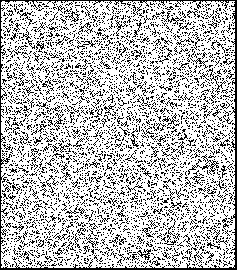

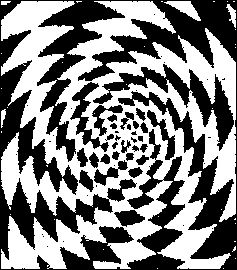

In [51]:
# https://towardsdatascience.com/the-abcs-of-approximate-bayesian-computation-bfe11b8ca341

echantillon = np.array(ImageOps.grayscale(Image.open('op-art-black-and-white-infinity-whirl-tom-hill.jpg')))
echantillon = 2*(echantillon/255) - 1
np.array(echantillon)
def mise_en_forme(echantillon, alpha, beta, tau):
  echantillon = np.array(echantillon)
  ech_vide = [[(0, 0, 0, 0) for j in range(echantillon.shape[1])] for i in range(echantillon.shape[0])]
  for i in range(echantillon.shape[0]):
    for j in range(echantillon.shape[1]):
      ech_vide[i][j] = (echantillon[i][j], alpha, beta, tau)
  return np.array(ech_vide)

echantillon = mise_en_forme(echantillon, 0, 0.3, 1.18)

#Fonction de sampling d'une loi d'Ising
def sample_x(i, j, Y, X, alpha, beta):
  markov_blanket = [Y[i - 1, j], Y[i, j - 1], Y[i, j + 1], Y[i + 1, j], Y[i, j]]
  prob = np.exp(alpha*markov_blanket[-1] + beta*np.sum(markov_blanket[:3]))/np.exp(alpha + 4*beta)
  return (np.random.rand() < prob) * 2 - 1

#Distance function - Absolute difference 
def distance_function(X,Y):
    Y = Y[1:height-1, 1:length-1]
    distance = np.mean(np.square((X - Y)))
    return distance

#The ABC method with uniform prior, returns samples from the posterior
def ABC_Method_Uniform_Prior(Observed_data,Number_of_Samples,threshold):
    #The observed data 
    #initialise Posterior array
    Posterior_distribution = []
    #trials
    #loop through to get the samples. 
    for i in range(0,Number_of_Samples):
        distance = threshold+1
        #While the distance is greater than the threshold continue to sample theta from the beta distribution
        while distance > threshold:
            #sample theta from the prior
            img_random = 2*np.random.randint(2, size=(height, length))-1
            alpha_sample = np.random.laplace(0, 0.01)
            beta_sample = np.random.rayleigh(0.4)
            tau_sample = 1/np.random.gamma(3, 2)
            x_sample = [[sample_x(i, j, img_random, bruit_test_norm, alpha_sample, beta_sample) for j in range(1, echantillon.shape[1]-1)] for i in range(1, echantillon.shape[0]-1)]
            theta = mise_en_forme(x_sample, alpha_sample, beta_sample, tau_sample)
            # calcalute the distance from Y 
            distance = distance_function(theta,Observed_data)
            print(distance)
        Posterior_distribution.append(theta)
    return Posterior_distribution

result = ABC_Method_Uniform_Prior(echantillon,1,0.5)
print("alpha : {}, beta : {}, tau : {}".format(result[0][0][0][1], result[0][0][0][2], result[0][0][0][3]))

# On récupère l'image directement donnée par l'algorithme ABC
img_ABC = np.zeros((height,length))
for i in range(1, height-2):
  for j in range(1, length-2):
    img_ABC[i,j] = result[0][i][j][0]
img_ABC_display = Image.fromarray(np.uint8(img_ABC)).convert('L')
display(img_ABC_display)

# On récupère l'image donnée par les paramètres tau, alpha et beta estimés par ABC
probas_Q1 = debruiteur(bruit_test_norm, 20, result[0][0][0][1], result[0][0][0][2], result[0][0][0][3])
probas_Q1[probas_Q1 > 0.5] = 255
probas_Q1[probas_Q1 <= 0.5] = 0
PIL_image3 = Image.fromarray(np.uint8(probas_Q1)).convert('L')
display(PIL_image3)